## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_df['Mouse ID'].value_counts().head()

g989    13
j989    10
o795    10
l897    10
z578    10
Name: Mouse ID, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_index = mouse_df.set_index('Mouse ID')
badmouse = mice_index.loc['g989', :]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
badmouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_index.drop(index = 'g989')
clean_df = clean_df.reset_index()
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1880

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = clean_df.groupby('Drug Regimen')

tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

summary_grouped = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Standard Deviation': tumor_std, 'SEM': tumor_sem})
summary_grouped

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

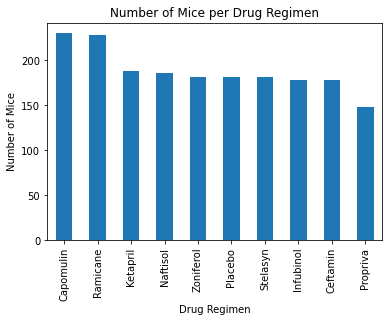

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

panda_bar = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.5)

panda_bar.set_xlabel("Drug Regimen")
panda_bar.set_ylabel("Number of Mice")
panda_bar.set_title("Number of Mice per Drug Regimen")

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

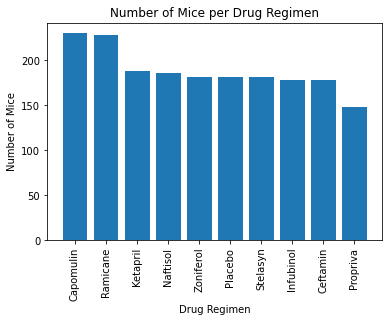

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = clean_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(drugs))

plt.bar(x_axis, drugs, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs.index.values)
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

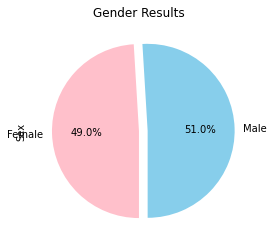

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df['Sex'].value_counts()
colors = ["skyblue", "pink"]
explode= (0.1,0)
panda_pie = gender_data.plot.pie(autopct="%1.1f%%",explode=explode, colors=colors, startangle=270, title='Gender Results')

Text(0.5, 1.0, 'Gender Results')

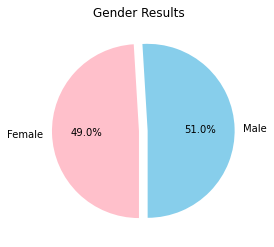

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode= (0.1,0)
colors = ["skyblue", "pink"]
plt.pie(gender_data, explode=explode,colors=colors, labels=gender_data.index.values, autopct="%1.1f%%", startangle=270)
plt.title('Gender Results')

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
maxtime = clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()
maxtime = maxtime.reset_index()
maxtime = maxtime.rename(columns={'Timepoint': 'Max Timepoint'})
maxtime_df = pd.DataFrame(maxtime)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedmaxtime_df = pd.merge(clean_df, maxtime_df, on='Mouse ID')
mergedmaxtime_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
topdrugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
voldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in topdrugs
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
